In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, nltk
import string
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from IPython.core.pylabtools import figsize
%config InlineBackend.figure_format = 'retina'
import plotly.express as px 

In [2]:
#function to load the dataset
def load(path: str) -> pd.DataFrame:
    rows = []

    with open(path, "r", encoding="latin-1") as data_in:
        for line in data_in:
            fine_category, input = line.split(None, 1)
            coarse_category, _ = fine_category.split(":")

            rows.append({
                "question": input.strip(),
                "fine_category": fine_category,
                "coarse_category": coarse_category
            })

    return pd.DataFrame(rows)

In [3]:
data = load("homework_research_scientist/data/train_5500.label.txt")

In [4]:
data['coarse_category'].value_counts()

ENTY    1250
HUM     1223
DESC    1162
NUM      896
LOC      835
ABBR      86
Name: coarse_category, dtype: int64

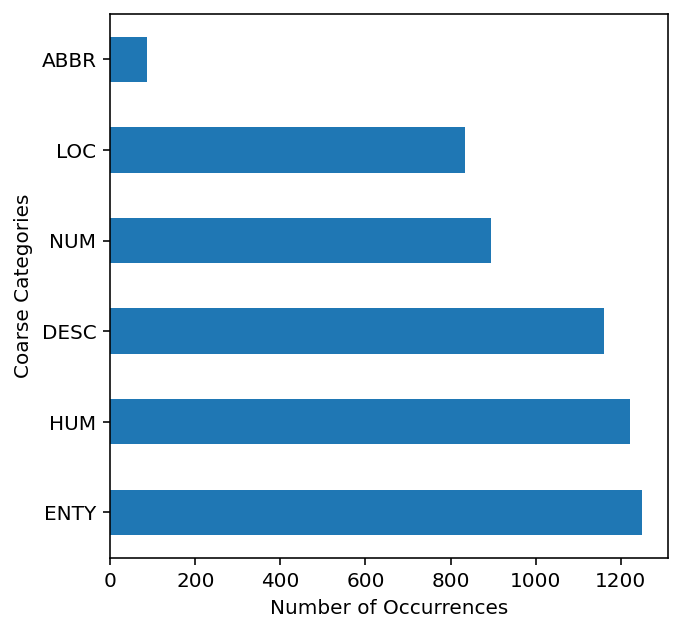

In [5]:
#coarse class distributions
figsize(5,5)
data['coarse_category'].value_counts().plot(kind="barh")
plt.xlabel("Number of Occurrences")
plt.ylabel("Coarse Categories")
plt.show()

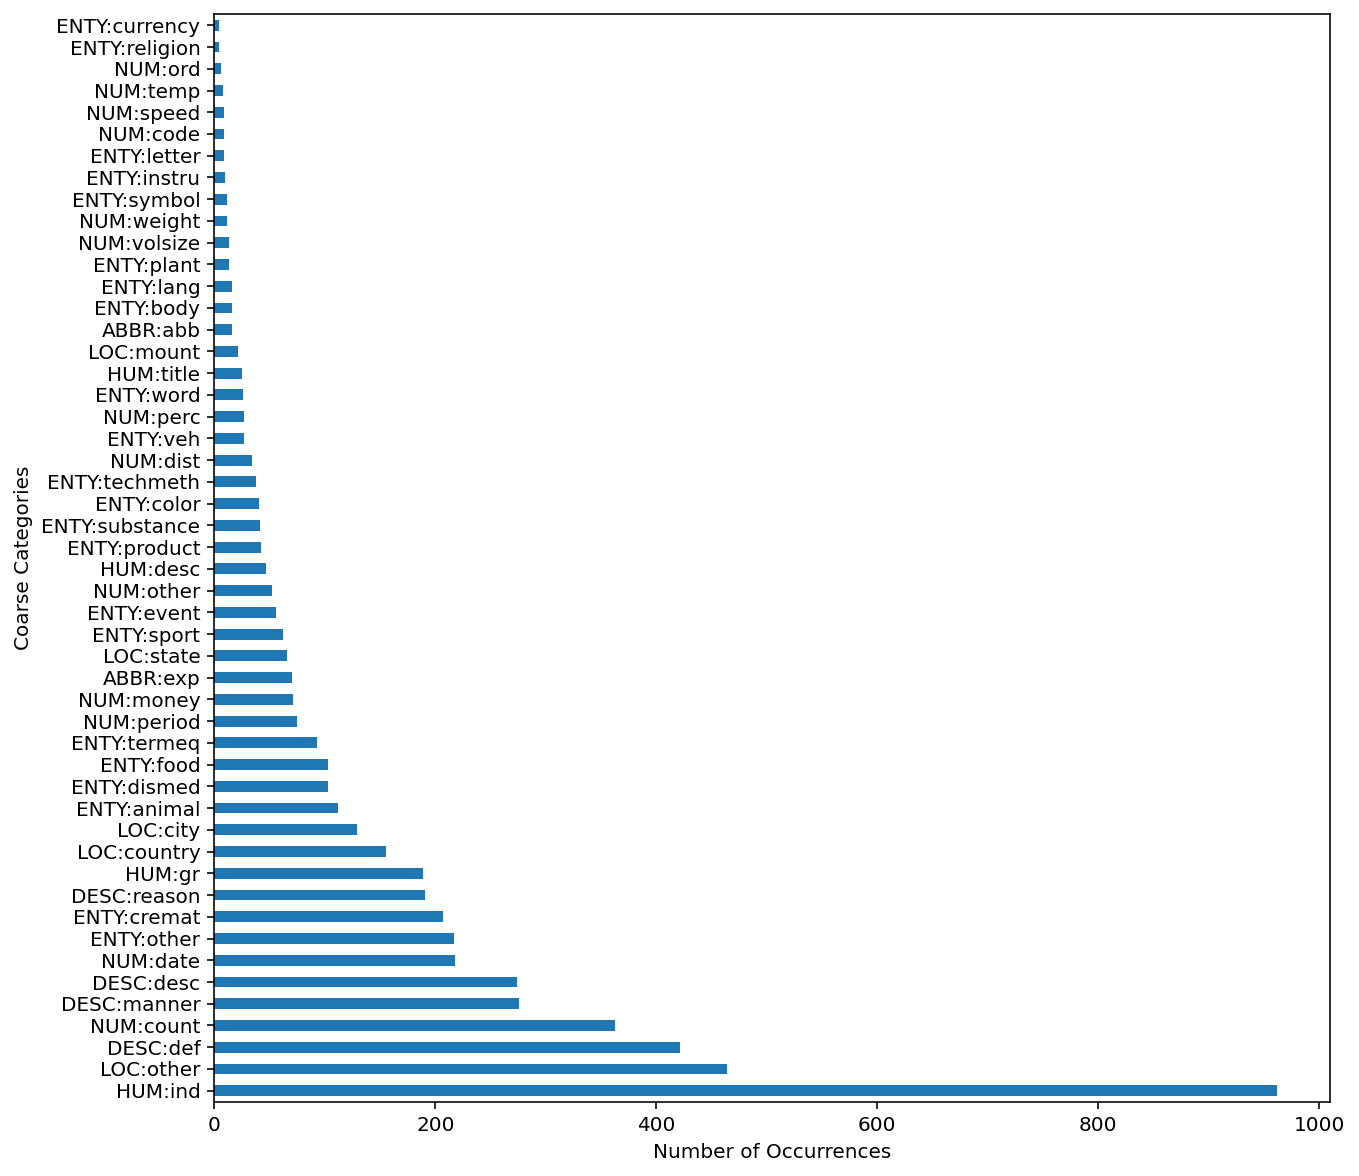

In [6]:
#fine class distributions
figsize(10,10)
data['fine_category'].value_counts().plot(kind="barh")
plt.xlabel("Number of Occurrences")
plt.ylabel("Coarse Categories")
plt.show()

In [55]:
#building basic features
data['char_count'] = data['question'].apply(len)
data['word_count'] = data['question'].apply(lambda x: (len(x.split())))
#data['word_density'] = data['char_count'] / (data['word_count']+1)
data['punctuation_count'] = data['question'].apply(lambda x: len("".join(char for char in x if char in string.punctuation)))
data['title_word_count'] = data['question'].apply(lambda x: len([word for word in x.split() if word.istitle()]))
data['upper_case_count'] = data['question'].apply(lambda x: len([word for word in x.split() if word.isupper()]))

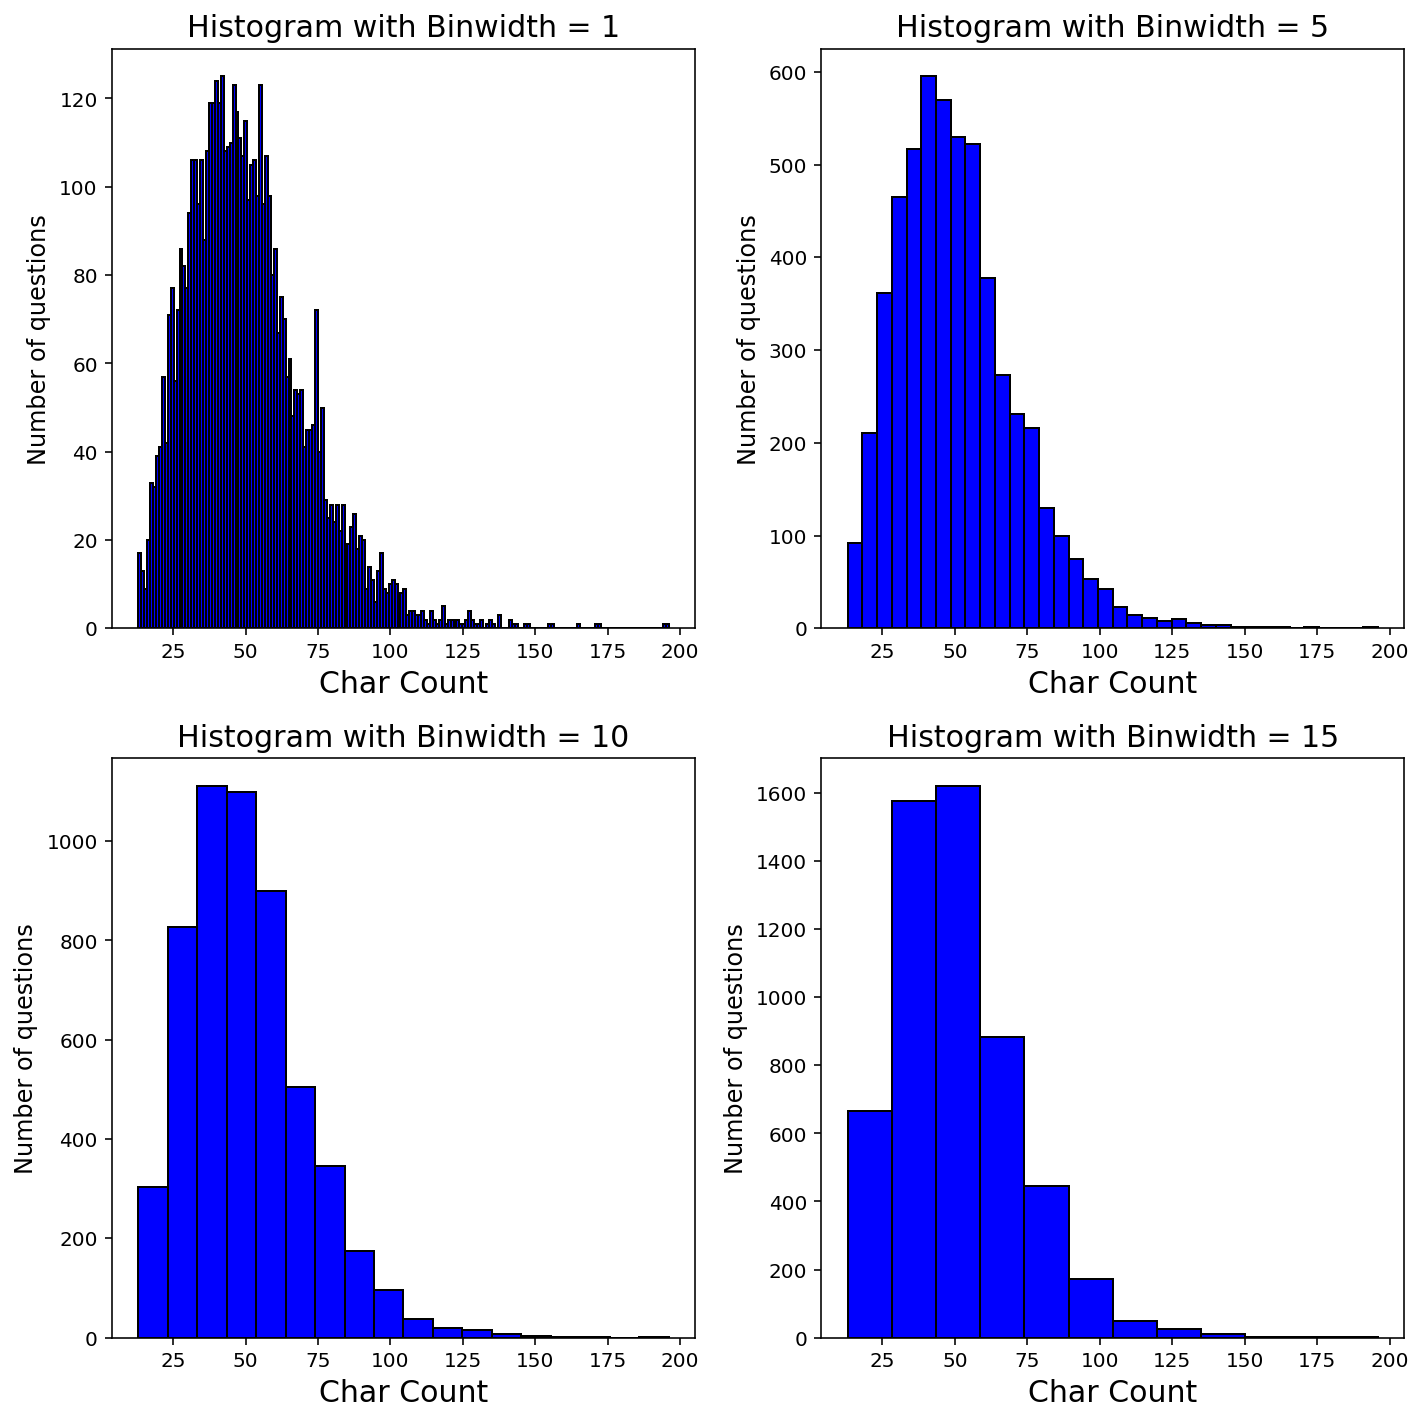

In [83]:
#plotting char count, basically length of word
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(data['char_count'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 15)
    ax.set_xlabel('Char Count', size = 15)
    ax.set_ylabel('Number of questions', size= 12)

plt.tight_layout()
plt.show()

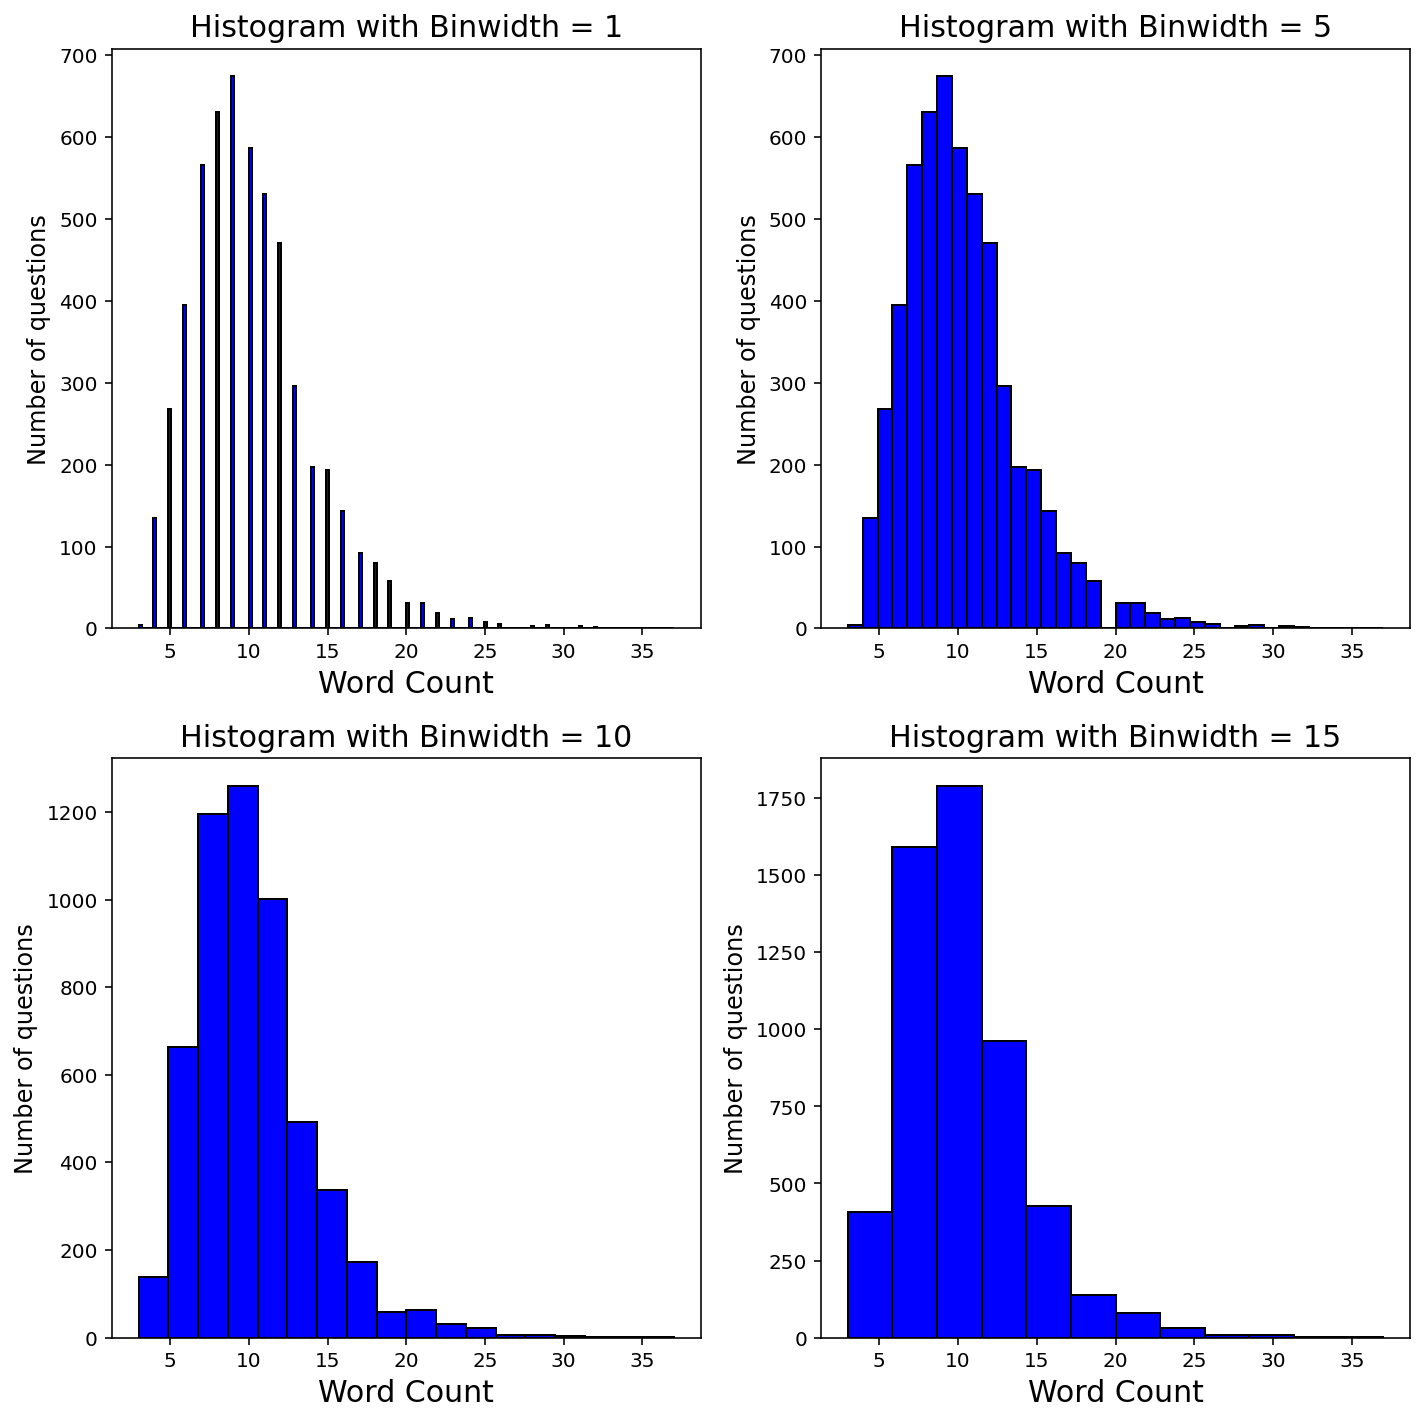

In [84]:
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(data['word_count'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 15)
    ax.set_xlabel('Word Count', size = 15)
    ax.set_ylabel('Number of questions', size= 12)

plt.tight_layout()
plt.show()

In [58]:
# for i, binwidth in enumerate([1, 5, 10, 15]):
    
#     # Set up the plot
#     ax = plt.subplot(2, 2, i + 1)
    
#     # Draw the plot
#     ax.hist(data['word_density'], bins = int(180/binwidth),
#              color = 'blue', edgecolor = 'black')
    
#     # Title and labels
#     ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 15)
#     ax.set_xlabel('Word Density', size = 15)
#     ax.set_ylabel('Number of qustions', size= 12)

# plt.tight_layout()
# plt.show()

In [ ]:
ENTY    1250
HUM     1223
DESC    1162
NUM      896
LOC      835
ABBR      86

In [31]:
list(data['coarse_category'].unique())

['DESC', 'ENTY', 'ABBR', 'HUM', 'NUM', 'LOC']

Text(0, 0.5, 'Density')

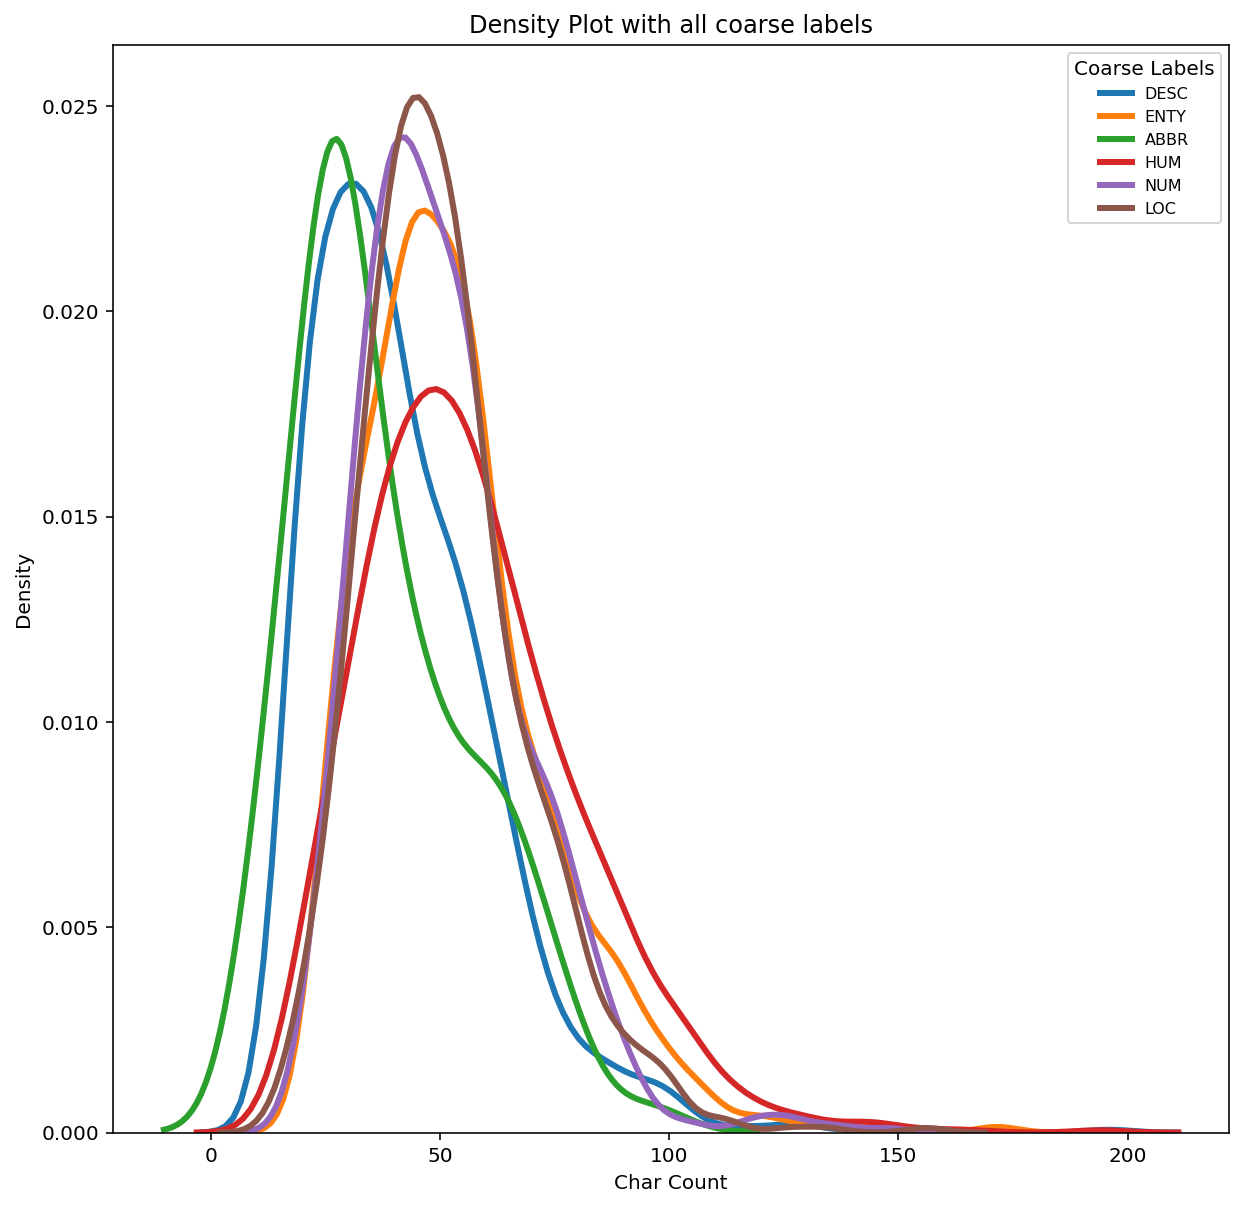

In [61]:
coarse_labels = ['DESC', 'ENTY', 'ABBR', 'HUM', 'NUM', 'LOC']

# Iterate through the five airlines
for coarse_label in coarse_labels:
    # Subset to the airline
    subset = data[data['coarse_category'] == coarse_label]
    
    # Draw the density plot
    sns.distplot(subset['char_count'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = coarse_label)
    
# Plot formatting
plt.legend(prop={'size': 8}, title = 'Coarse Labels')
plt.title('Density Plot with all coarse labels')
plt.xlabel('Char Count')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

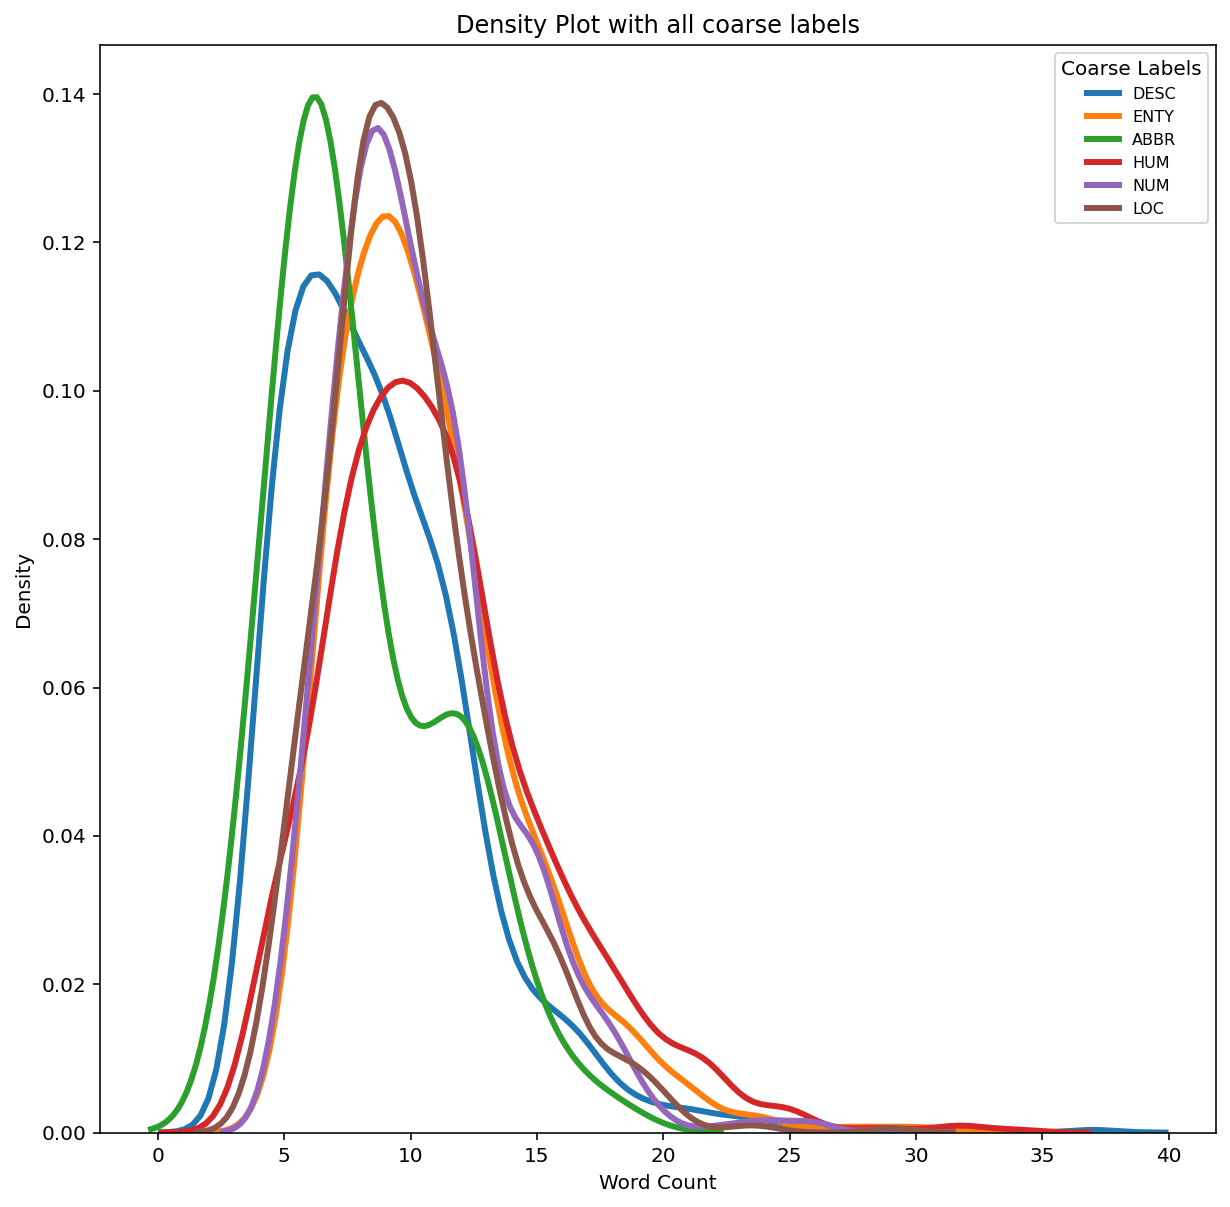

In [60]:
coarse_labels = ['DESC', 'ENTY', 'ABBR', 'HUM', 'NUM', 'LOC']

# Iterate through the five airlines
for coarse_label in coarse_labels:
    # Subset to the airline
    subset = data[data['coarse_category'] == coarse_label]
    
    # Draw the density plot
    sns.distplot(subset['word_count'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = coarse_label)
    
# Plot formatting
plt.legend(prop={'size': 8}, title = 'Coarse Labels')
plt.title('Density Plot with all coarse labels')
plt.xlabel('Word Count')
plt.ylabel('Density')

the 3775
what 3377
is 1681
of 1548
in 1207
how 789
was 653
to 615
who 614
are 453
for 453
and 433
does 390
did 388
do 336
many 332
name 331
on 325
where 286
first 201


<AxesSubplot:title={'center':'Top 20 words in review before removing stop words'}, xlabel='Question text', ylabel='Count'>

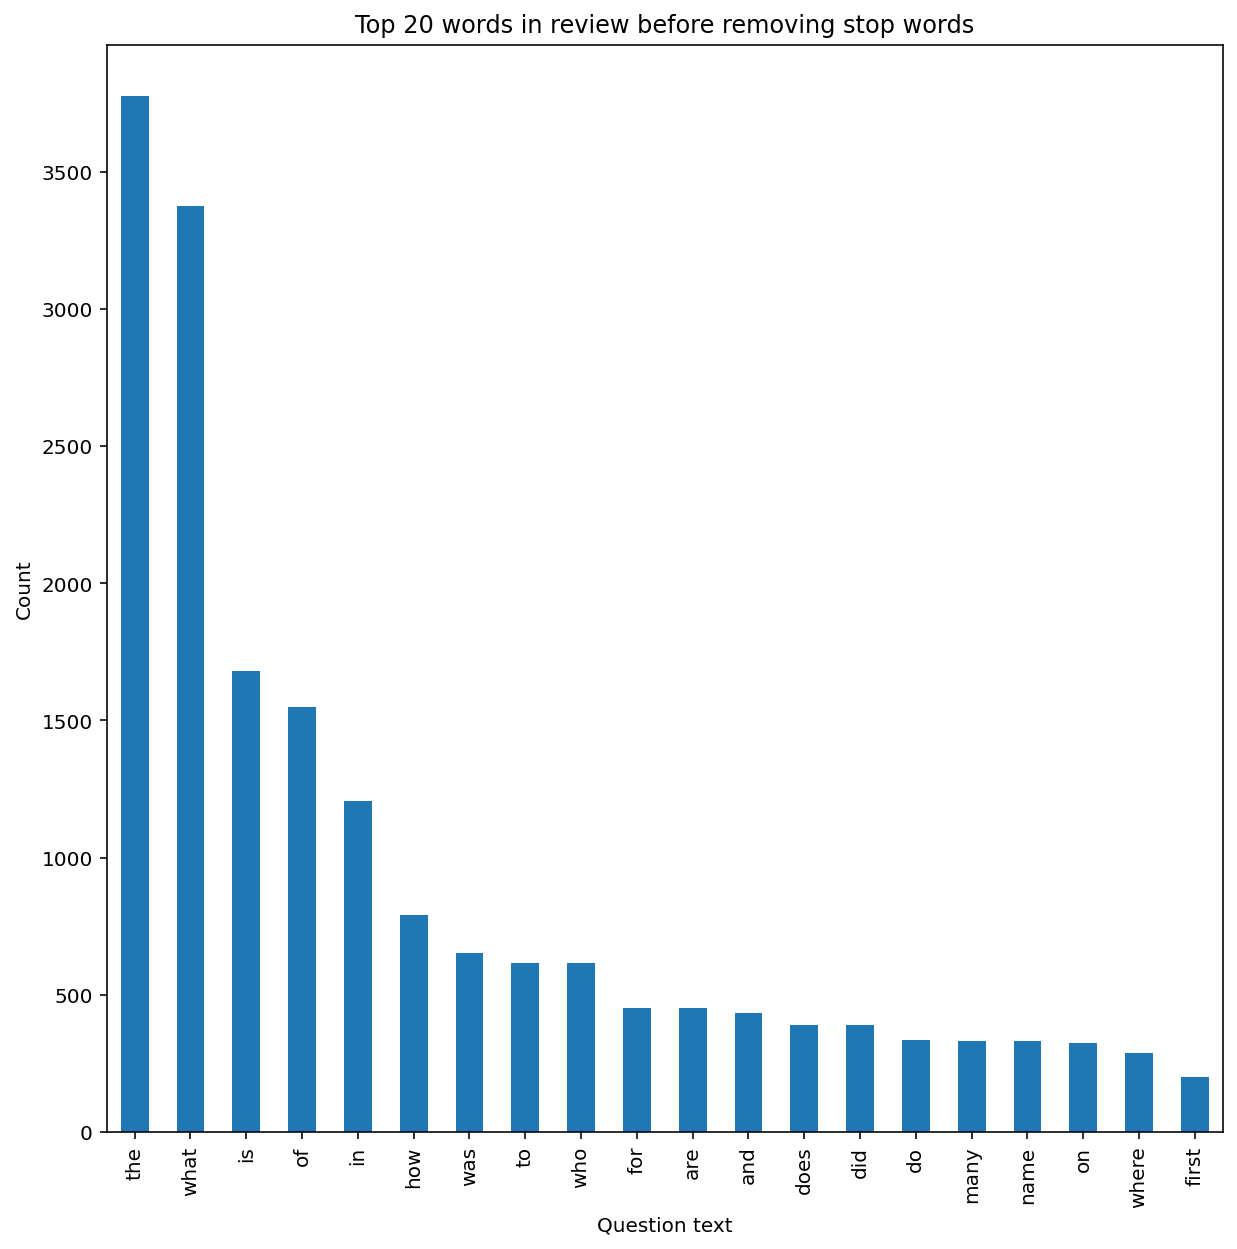

In [45]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['question'].values, 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Question text' , 'count'])
df1.groupby('Question text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Count',  title='Top 20 words in review before removing stop words')

does 390
did 388
world 165
country 133
city 119
people 91
year 87
called 84
state 81
president 79
american 77
mean 74
largest 74
war 74
fear 69
new 68
long 65
origin 57
used 57
word 57


<AxesSubplot:title={'center':'Top 20 words in review after removing stop words'}, xlabel='Question text', ylabel='Count'>

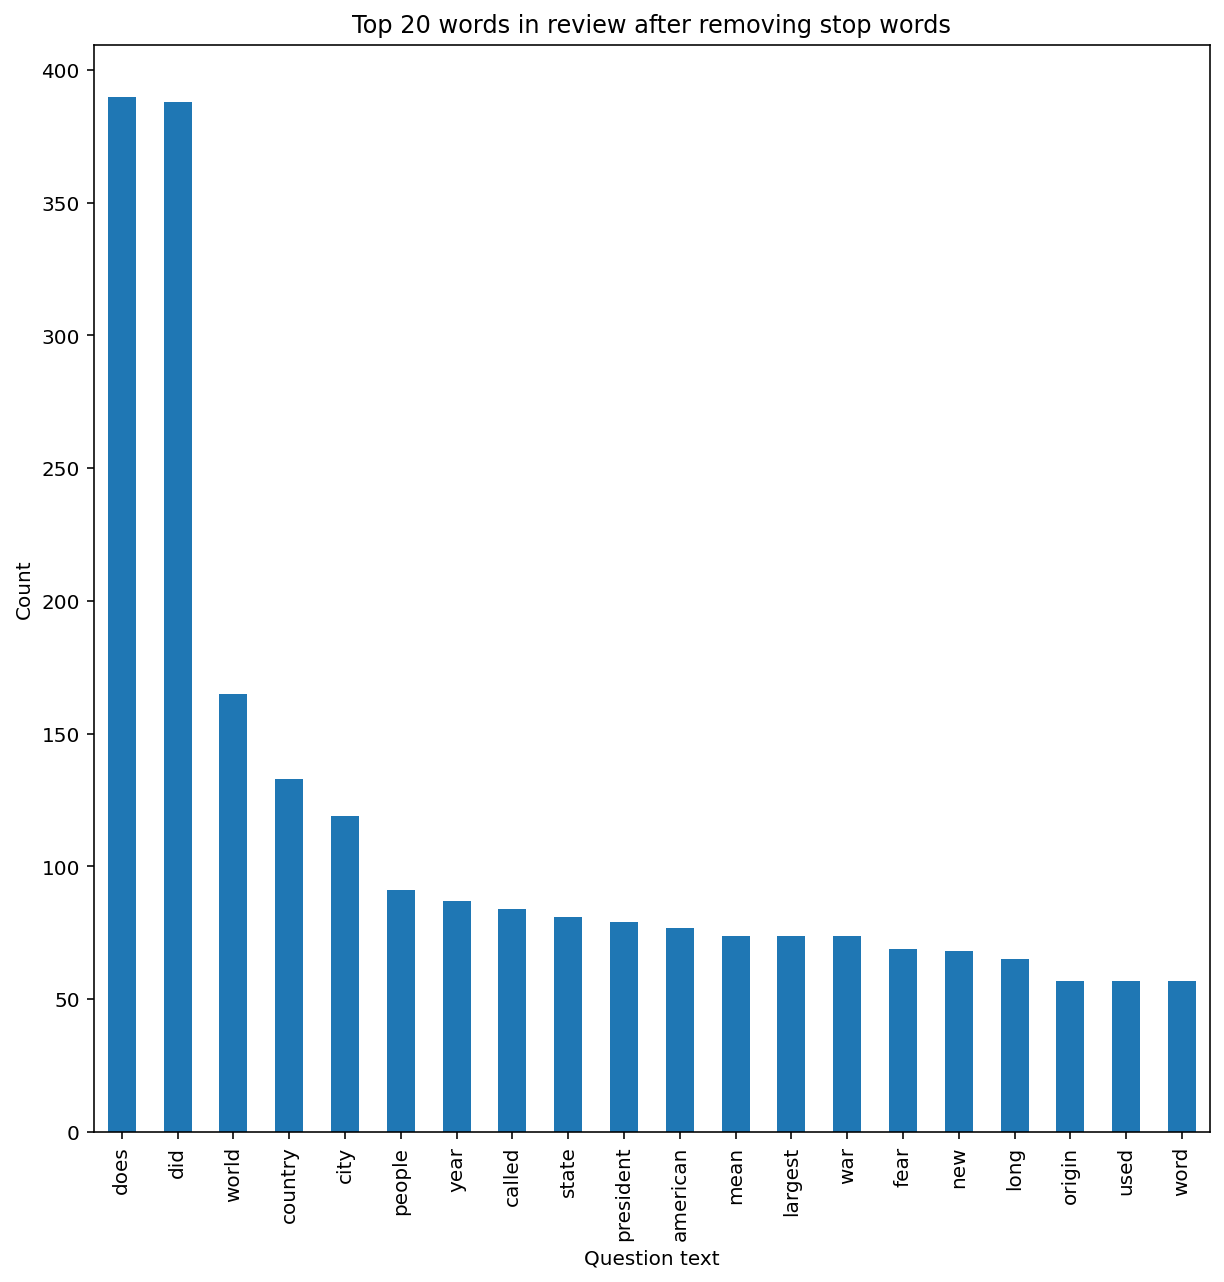

In [50]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['question'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Question text' , 'count'])
df2.groupby('Question text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Count',  title='Top 20 words in review after removing stop words')


year did 24
new york 24
united states 23
world war 23
long does 20
origin word 17
war ii 16
soft drink 14
baseball team 13
prime minister 11
civil war 11
randy craft 10
los angeles 9
country did 9
john kennedy 9
vietnam war 9
shea gould 9
richard nixon 9
does stand 8
american soldiers 8


<AxesSubplot:title={'center':'Top 20 bigrams in review after removing stop words'}, xlabel='Question text', ylabel='Count'>

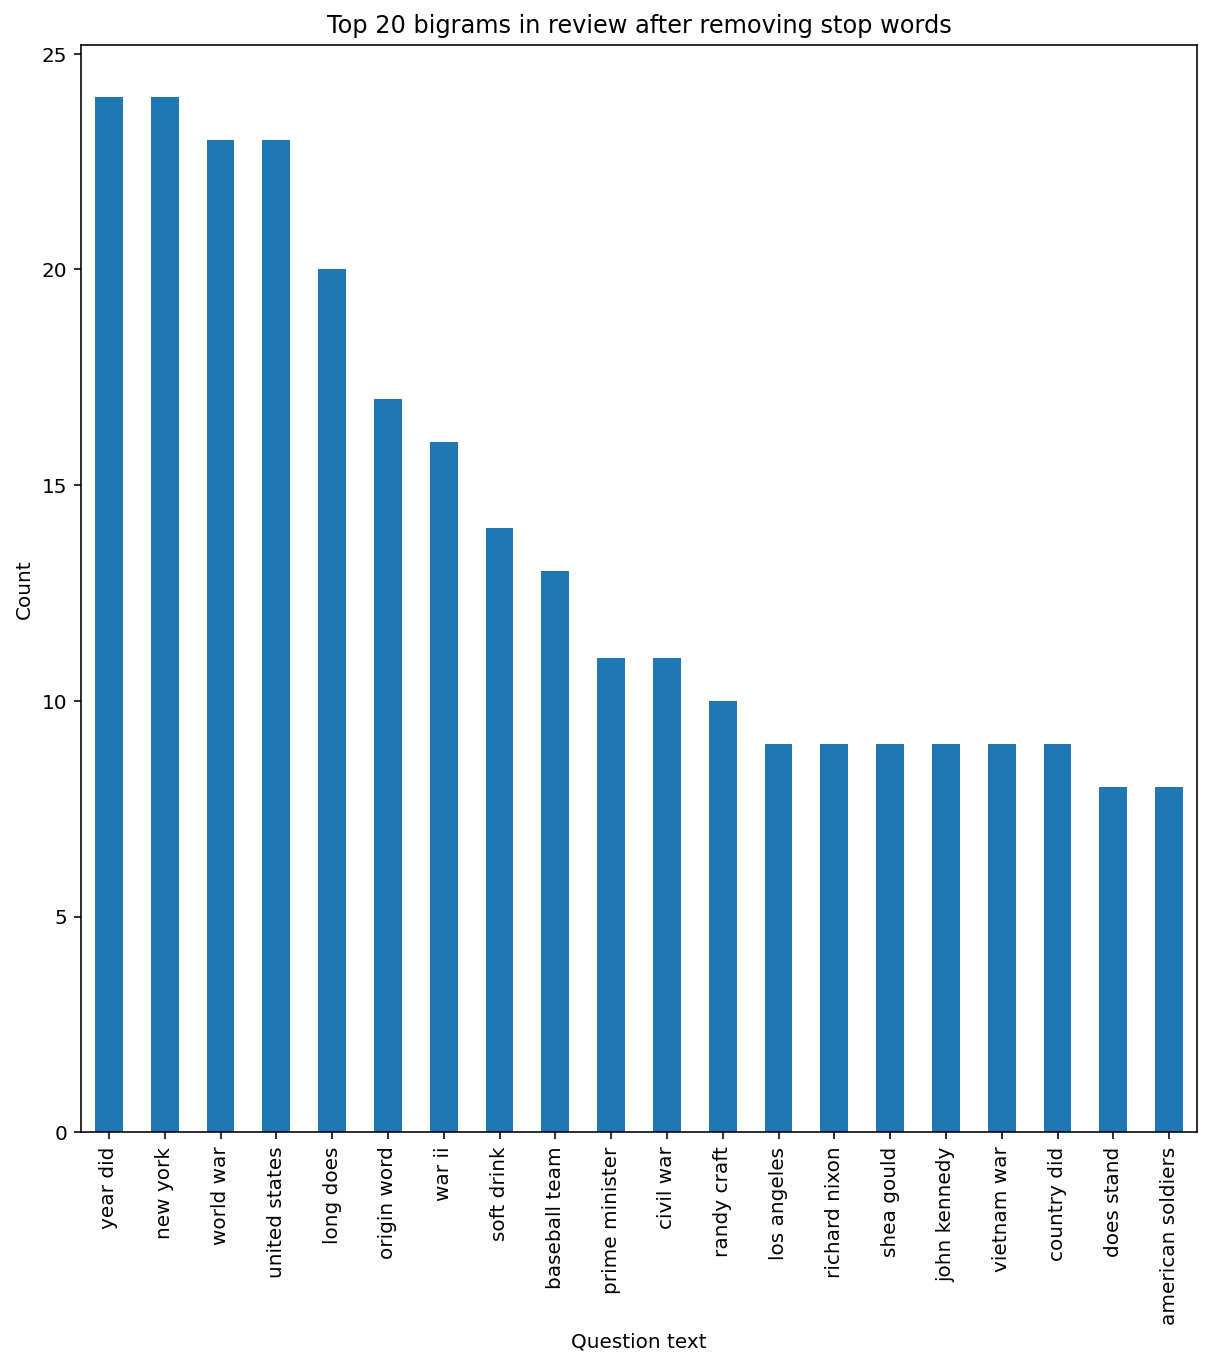

In [51]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(data['question'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Question text' , 'count'])
df4.groupby('Question text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Count',  title='Top 20 bigrams in review after removing stop words')


what is the 554
what are the 134
what was the 132
the name of 112
name of the 88
who was the 85
was the first 67
how do you 65
in the world 59
who is the 59
what is fear 58
is fear of 58
is the name 56
the origin of 54
is the origin 53
what does the 49
what kind of 46
was the name 44
where can find 42
origin of the 41


<AxesSubplot:title={'center':'Top 20 trigrams in review before removing stop words'}, xlabel='Question text', ylabel='Count'>

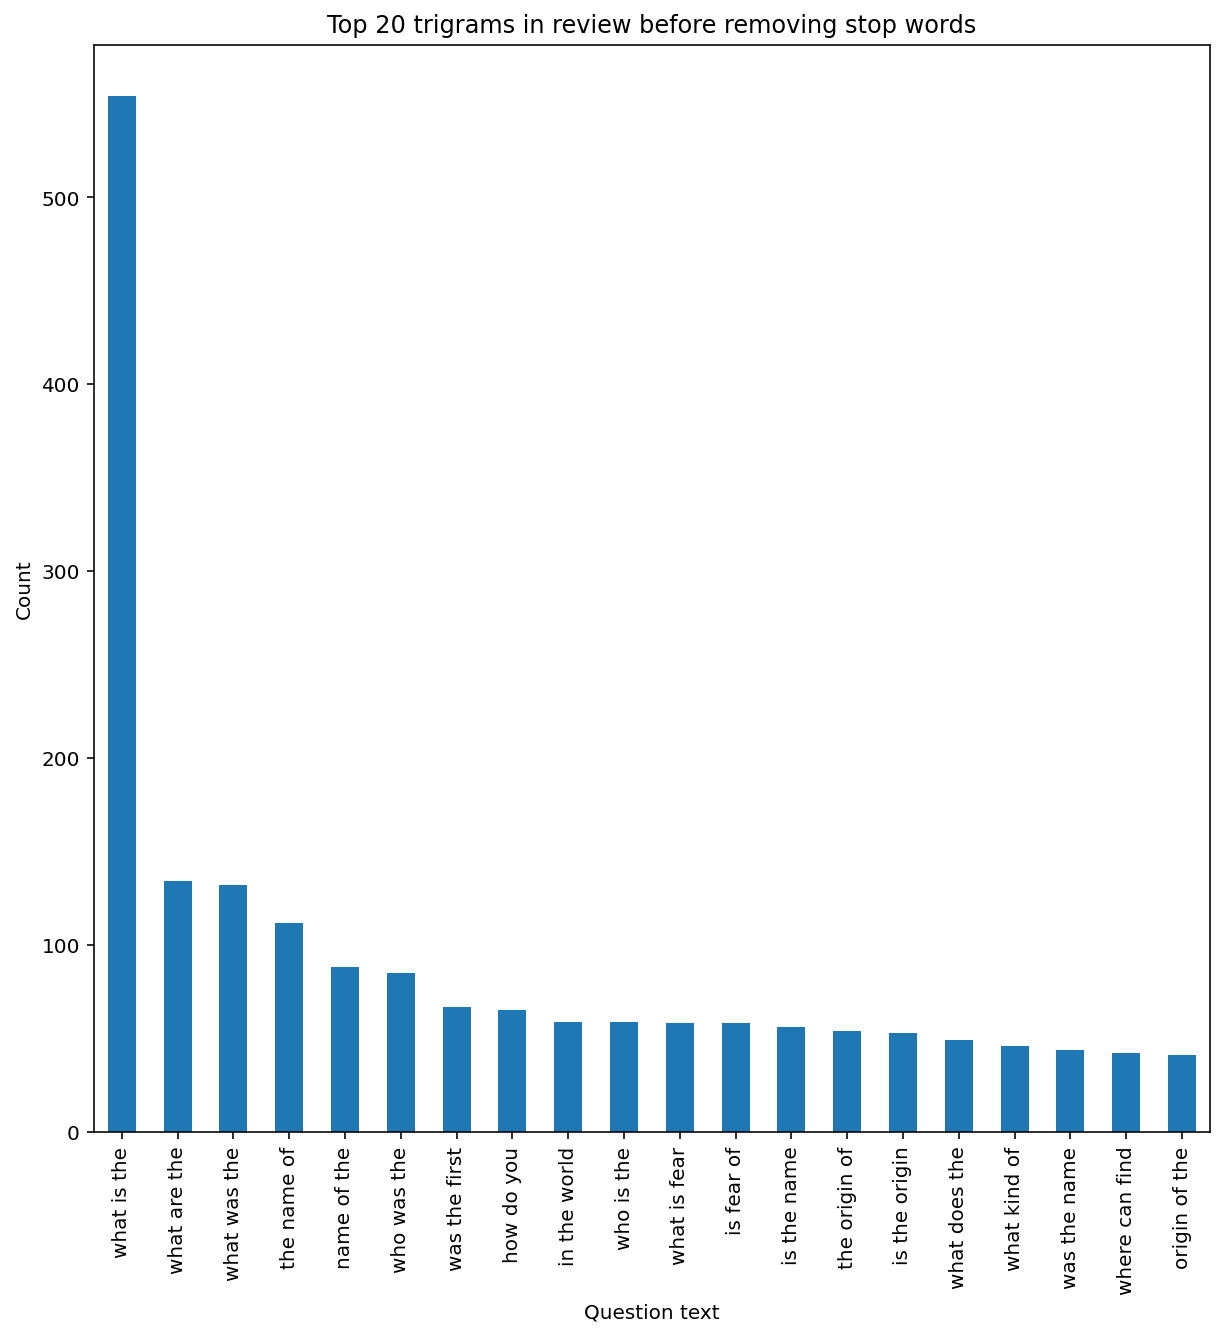

In [52]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(data['question'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['Question text' , 'count'])
df5.groupby('Question text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Count',  title='Top 20 trigrams in review before removing stop words')


world war ii 16
randy steven craft 8
new york city 6
kentucky horse park 6
lawyer represented randy 5
peachy oat muffins 5
national bureau investigation 5
having dog beach 5
did dikembe mutombo 5
unaccounted vietnam war 4
baking peachy oat 4
ibm compatible machines 4
nadia comaneci popular 4
minimum wage 1991 4
league baseball team 4
islamic counterpart red 4
counterpart red cross 4
lee harvey oswald 4
did shea gould 4
college did dikembe 4


<AxesSubplot:title={'center':'Top 20 trigrams in review after removing stop words'}, xlabel='Question text', ylabel='Count'>

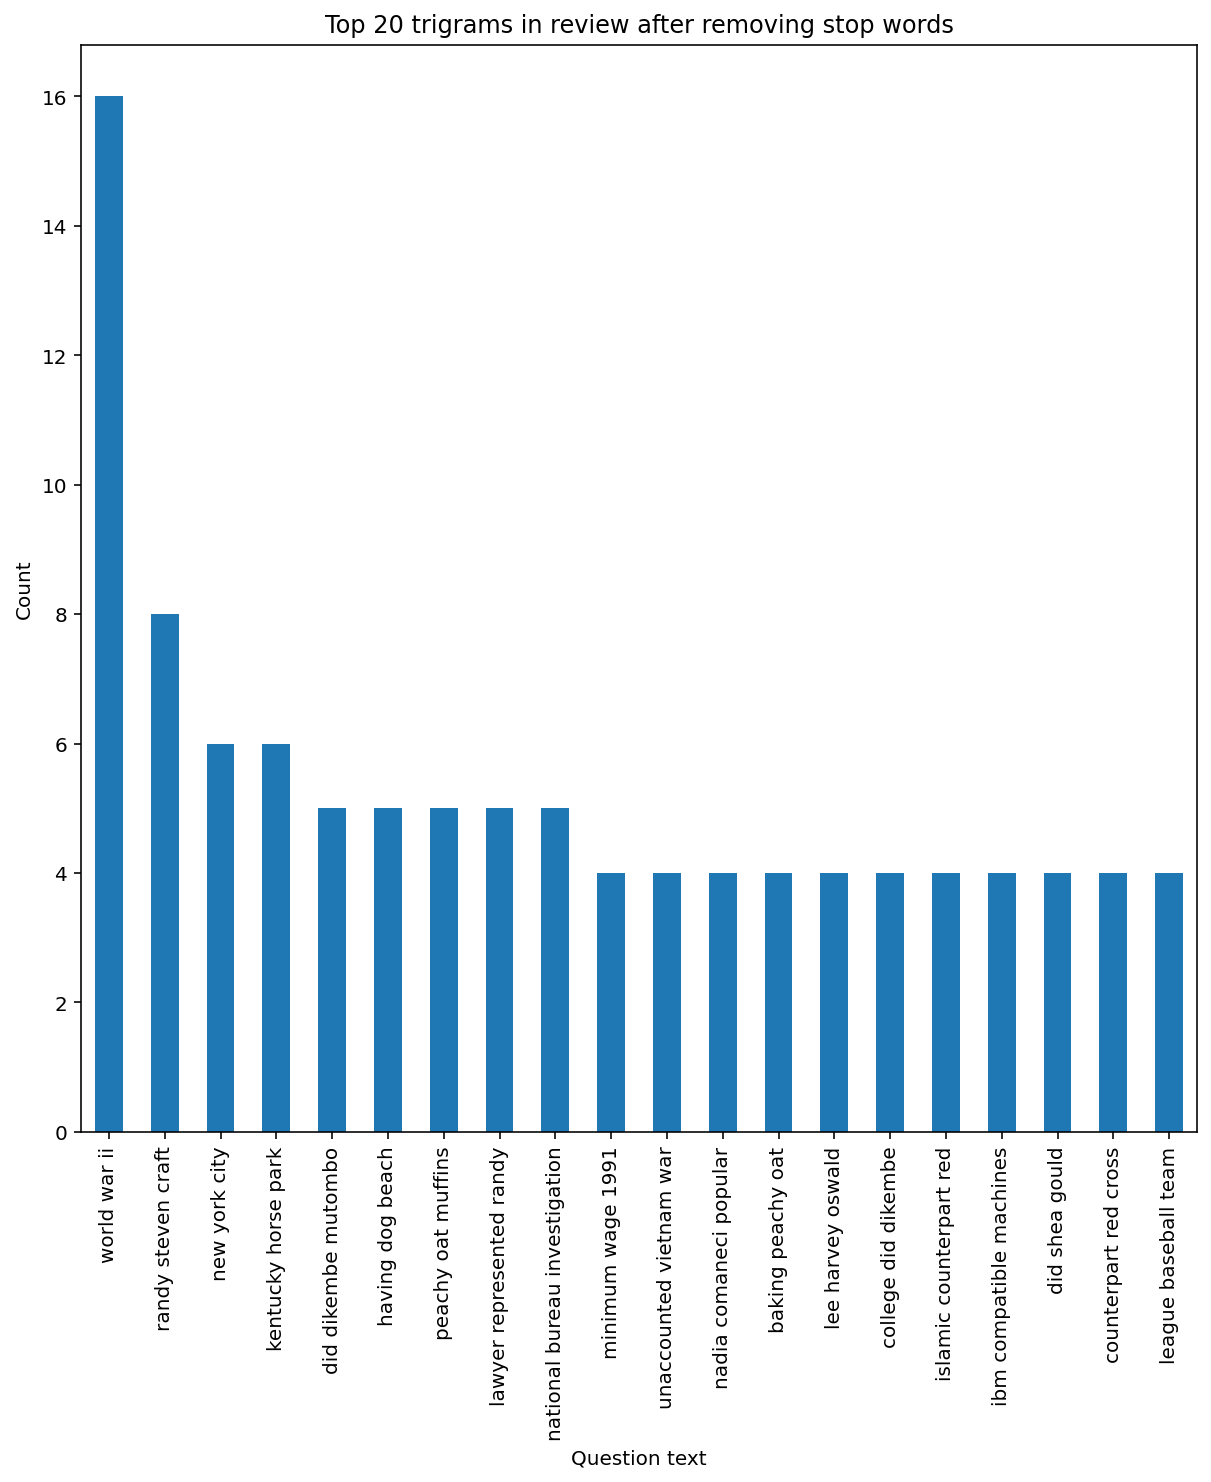

In [82]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(data['question'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['Question text' , 'count'])
df6.groupby('Question text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Count', title='Top 20 trigrams in review after removing stop words')


<AxesSubplot:title={'center':'Top 20 Part-of-speech tagging for review corpus'}, xlabel='POS', ylabel='count'>

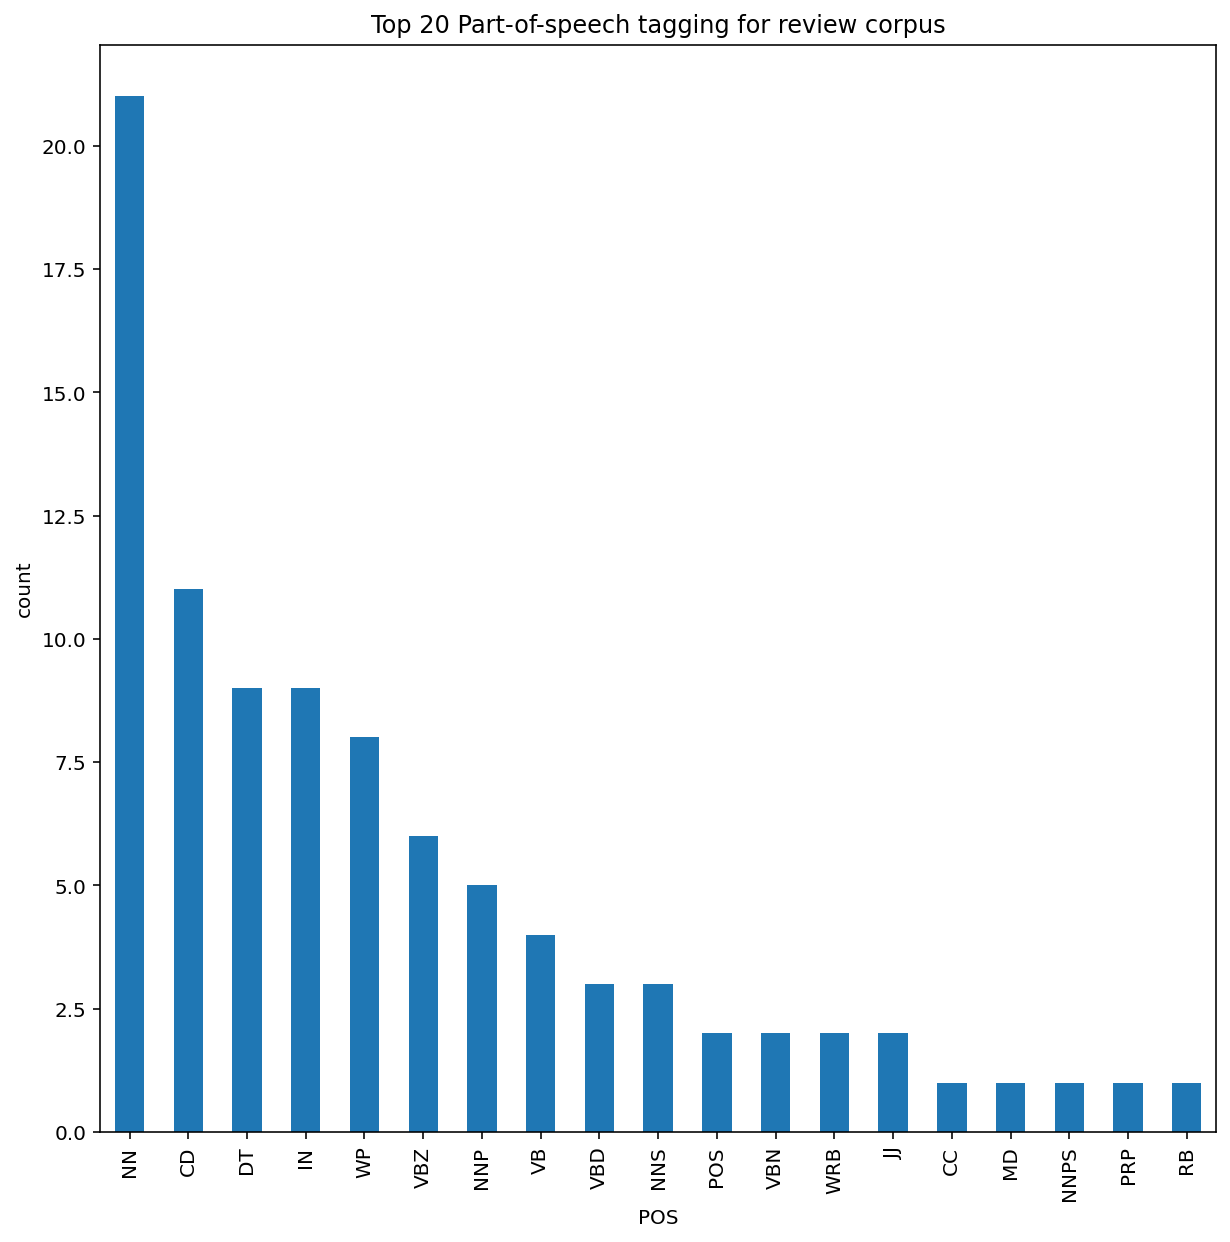

In [54]:
from textblob import TextBlob
blob = TextBlob(str(data['question']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(
    kind='bar',
    xlabel='POS',
    ylabel='count', 
    title='Top 20 Part-of-speech tagging for review corpus')